# EDA

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
DATA_PATH = os.path.join('data', 'transactions.csv')
TARGET_PATH = os.path.join('data', 'beeline_antispam_hakaton_id_samples.csv')

In [3]:
data = pd.read_csv(
    DATA_PATH,
    dtype={
        'time_zone': 'int8',
        'forward': 'int8',
        'zero_call_flg': 'int8',
        'source_b': 'int8',
        'source_f': 'int8',
        'num_b_length': 'int8',
        'duration': 'int16',
    },
    parse_dates=['datetime'],
)
data.head()

,id_a,id_b,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,datetime
0,67596082,43588153,3,0,0,3,0,1,10,2021-11-01 18:43:03
1,4024969,67656553,4,206,0,5,1,0,10,2021-11-01 11:43:20
2,43166780,31861625,0,5,0,0,0,1,10,2021-11-01 10:32:36
3,51817902,41201237,3,0,0,0,0,1,10,2021-11-01 13:45:02
4,41812796,4932754,0,0,0,5,0,1,10,2021-11-01 13:53:12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267702661 entries, 0 to 267702660
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id_a           int64         
 1   id_b           int64         
 2   time_zone      int8          
 3   duration       int16         
 4   forward        int8          
 5   zero_call_flg  int8          
 6   source_b       int8          
 7   source_f       int8          
 8   num_b_length   int8          
 9   datetime       datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int64(2), int8(6)
memory usage: 8.0 GB


---

In [5]:
targets = pd.read_csv(TARGET_PATH, dtype={'split': 'category'})
targets['target'] = targets['target'].replace({
    np.NaN: 'test',
    0.: 'не спам',
    1.: 'небольшие полезные ИП / малые бизнесы',
    2.: 'организации',
    3.: 'мобильная карусель',
    4.: 'чёрные спаммеры и мошенники',
}).astype('category')
targets = targets.drop(columns='split')
targets.head()

,id,target
0,196535,test
1,63075900,организации
2,35233935,организации
3,23557360,чёрные спаммеры и мошенники
4,78926486,test


In [6]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46235 entries, 0 to 46234
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      46235 non-null  int64   
 1   target  46235 non-null  category
dtypes: category(1), int64(1)
memory usage: 406.7 KB


---

In [7]:
data = data.merge(targets, left_on='id_a', right_on='id', how='left')
data = data.drop(columns='id')
data = data.rename(columns={'target': 'target_a'})
data.head()

,id_a,id_b,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,datetime,target_a
0,67596082,43588153,3,0,0,3,0,1,10,2021-11-01 18:43:03,чёрные спаммеры и мошенники
1,4024969,67656553,4,206,0,5,1,0,10,2021-11-01 11:43:20,test
2,43166780,31861625,0,5,0,0,0,1,10,2021-11-01 10:32:36,чёрные спаммеры и мошенники
3,51817902,41201237,3,0,0,0,0,1,10,2021-11-01 13:45:02,чёрные спаммеры и мошенники
4,41812796,4932754,0,0,0,5,0,1,10,2021-11-01 13:53:12,чёрные спаммеры и мошенники


In [8]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267702661 entries, 0 to 267702660
Data columns (total 11 columns):
 #   Column         Non-Null Count      Dtype         
---  ------         --------------      -----         
 0   id_a           267702661 non-null  int64         
 1   id_b           267702661 non-null  int64         
 2   time_zone      267702661 non-null  int8          
 3   duration       267702661 non-null  int16         
 4   forward        267702661 non-null  int8          
 5   zero_call_flg  267702661 non-null  int8          
 6   source_b       267702661 non-null  int8          
 7   source_f       267702661 non-null  int8          
 8   num_b_length   267702661 non-null  int8          
 9   datetime       267702661 non-null  datetime64[ns]
 10  target_a       267702661 non-null  category      
dtypes: category(1), datetime64[ns](1), int16(1), int64(2), int8(6)
memory usage: 8.2 GB


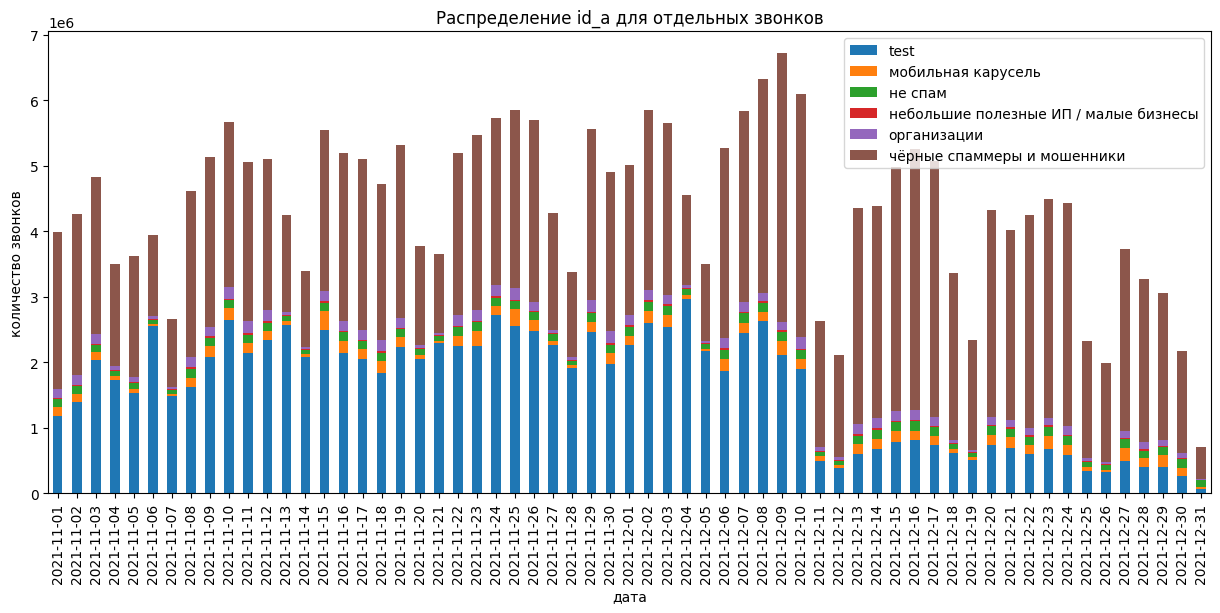

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))

(
    data.groupby([pd.Grouper(key='datetime', freq='D'), 'target_a'])['time_zone'].count().unstack()
    .plot(kind='bar', stacked=True, rot=90, title='Распределение id_a для отдельных звонков', ax=ax)
)
ax.set(xlabel='дата', xticklabels=grouped.index.format(), ylabel='количество звонков')
ax.legend(title=None)

plt.show()

# Пока здесь

In [10]:
for i in ['id', 'target', 'split']:
    del data[i]

KeyError: 'id'

In [ ]:
data = data.merge(targets, left_on='id_b', right_on='id', how='left')
data.head()

In [ ]:
data['quasi_target_b'] = data.apply(gen_quasi_target, axis=1)

In [ ]:
grouped = data.groupby([pd.Grouper(key='datetime', freq='D'), 'quasi_target_b'])['time_zone'].count().unstack()

fig, ax = plt.subplots(figsize=(15, 6))

grouped.plot(kind='bar', stacked=True, rot=90, title='Распределение id_b для отдельных звонков', ax=ax)
ax.set(xlabel='дата', xticklabels=grouped.index.format(), ylabel='количество звонков')
ax.legend(title=None)

plt.show()

In [ ]:
for i in ['id', 'target', 'split']:
    del data[i]